In [1]:
import numpy as np, healpy as hp, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_bias(qobj,qid=None,cn=1,normcorr=False,plot_real=False,fac=1.,frac=False,r2=0.23/0.51,r4=0.15/0.52):
    l, al = (np.loadtxt(qobj.f['TT'].al,usecols=(0,cn))).T
    l, n0 = (np.loadtxt(qobj.f['TT'].n0bs,usecols=(0,cn))).T
    #l, ml = (np.loadtxt(qobj.f['TT'].MFcl,usecols=(0,cn))).T
    l, cl, xl, kk = (np.loadtxt(qobj.f['TT'].mcls,usecols=(0,cn,3,4))).T
    ol = (np.loadtxt(qobj.f['TT'].cl[0])).T[cn]
    rd = (np.loadtxt(qobj.f['TT'].rdn0[0])).T[cn]
    if normcorr:
        if qid=='boss_s15n':
            r2=0.23/0.38 #not justified
            r4=0.15/0.38 #not justified
        xl = xl/r2
        cl = cl/r4
        n0 = n0/r4
        CL = cl-n0
        #CL = (cl-n0)*(kk/xl)**2*fac
        OL = (ol-rd)/r4
    else:
        CL = cl-n0
        OL = ol-rd
    if frac:
        pl.plot_1dstyle(fsize=[15,4],xmin=2,xmax=2048,ymin=.1,ymax=2.,ylab=r'Ratio of $C_L^{\kappa\kappa}$')
        plot(l,CL/kk,label='cl',color='r')
        plot(l,xl/kk,label='xl',color='g')
        axhline(1,color='k',ls='--')
        legend()
    else:
        pl.plot_1dstyle(fsize=[15,4],xmin=2,xmax=2048,ymin=1e-9,ymax=1e-5,ylog=True,ylab='$C_L^{\kappa\kappa}$')
        if cn==1 and plot_real: 
            plot(l,OL,label='ol',color='c')
        else:
            plot(l,al,label='norm',color='m')
            plot(l,n0,label='N0',color='y')
            plot(l,cl/99.,label='MF-MC',color='b',ls='--')
            plot(l,CL,label='cl',color='r')
            if cn==2: plot(l,OL,label='ol',color='c')
            plot(l,xl,label='xl',color='g')
            plot(l,kk,label='input',color='k')
            legend()
    return CL

In [10]:
#qid = 'boss_s15d'
#qid = 'boss_s15dn'
#qid = 'boss_s16d'
#qid = 'boss_alldn'
qid = 'boss_s15n'

In [11]:
dirs = local.data_directory()
rlmax = 3000
rlmin = 500
aobj0 = local.init_analysis_params(qid=qid,fltr='cinv',ptsr='base')
qobj0 = quad_func.reconstruction(dirs['local'],aobj0.ids,stag=aobj0.stag,rlmin=rlmin,rlmax=rlmax,qlist=['TT'])
Qobj0 = quad_func.reconstruction(dirs['local'],aobj0.ids,stag=aobj0.stag,rlmin=rlmin,rlmax=rlmax,qlist=['TT'],bhe=['src'])

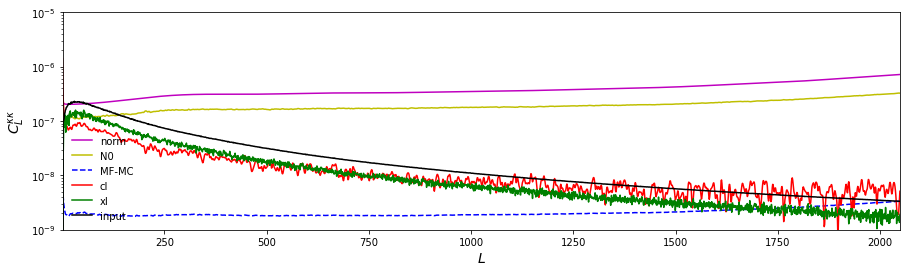

In [12]:
cl = plot_bias(qobj0)

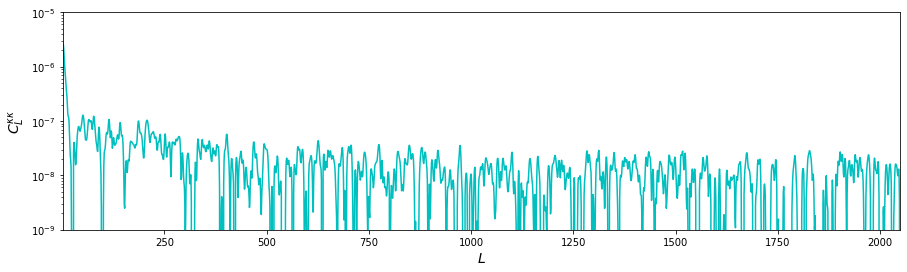

In [13]:
cl = plot_bias(qobj0,plot_real=True)

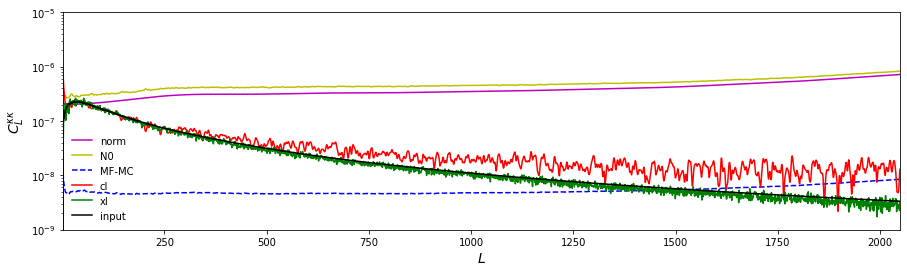

In [14]:
cl0 = plot_bias(qobj0,qid=aobj0.qid,normcorr=True)

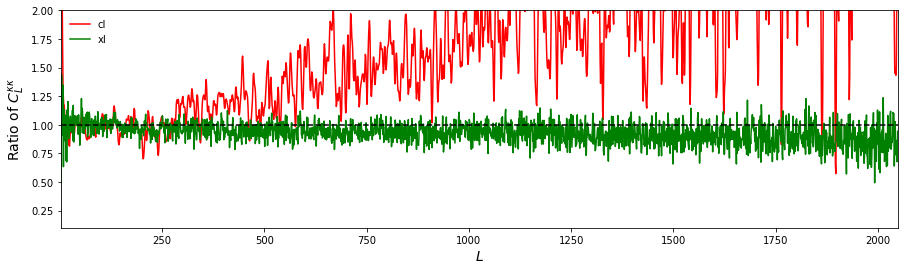

In [15]:
cl0 = plot_bias(qobj0,qid=aobj0.qid,frac=True,normcorr=True)

### Real data

11.561640193870637
obs A 1.0 mean(A) 1.0 sigma(A) 0.119 S/N 8.38 A>oA 0.98


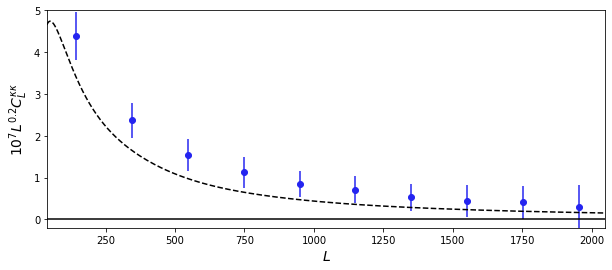

11.561640193870637
obs A 1.0 mean(A) 1.0 sigma(A) 0.119 S/N 8.38 A>oA 0.98


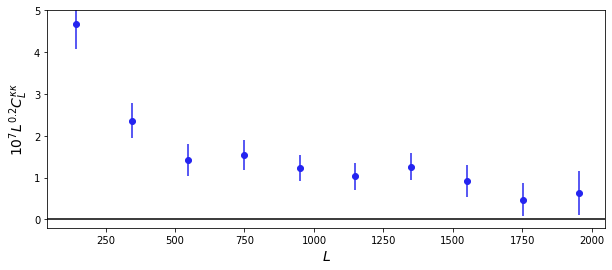

10.633485628677795
obs A 1.0 mean(A) 1.001 sigma(A) 0.126 S/N 7.92 A>oA 0.96


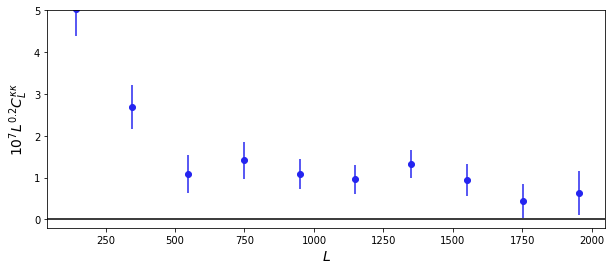

In [16]:
local.plot_spec_kk(qobj0,ymax=5,lfac=0.2,norm=0.52/0.15)
local.plot_spec_kk(qobj0,plot_real=True,ymax=5,lfac=0.2,norm=0.52/0.15)
local.plot_spec_kk(Qobj0,plot_real=True,ymax=5,lfac=0.2,norm=0.52/0.15)